In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import get_db
import prepare

In [2]:
df = get_db.get_telco_data()

In [3]:
df = df.drop_duplicates()
df = df.drop(['payment_type_id', 'payment_type','internet_service_type_id', 'internet_service_type', 'contract_type_id', 'contract_type',
              'gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'online_security', 'online_backup', 'multiple_lines',
             'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'churn', 'total_charges'], axis = 1)

In [4]:
def total_charges(df):
    """
    Takes in the telco df and returns the df with new 
    categorical feature 'tenure_years' also adds total_charges as float. Could not convert orginal column.
    """
    df['total_charges'] = (df.monthly_charges * df.tenure).astype('float64')

    return df

In [5]:
df = total_charges(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      7043 non-null   object 
 1   tenure           7043 non-null   int64  
 2   monthly_charges  7043 non-null   float64
 3   total_charges    7043 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 275.1+ KB


In [6]:
#moved up from question 3 in order to train all data
def months_to_years():
    df['tenure_years'] = ((df['monthly_charges'] * df['tenure'])/12).astype('object')
    return df

In [7]:
df = months_to_years()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      7043 non-null   object 
 1   tenure           7043 non-null   int64  
 2   monthly_charges  7043 non-null   float64
 3   total_charges    7043 non-null   float64
 4   tenure_years     7043 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 330.1+ KB


1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [8]:
train_validate, test = train_test_split(df, test_size=0.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=0.3, random_state=123)
print(f"train -> {train.shape}")
print(f"validate -> {validate.shape}")
print(f"test -> {test.shape}")

train -> (3943, 5)
validate -> (1691, 5)
test -> (1409, 5)


2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [9]:
def plot_variable_pairs(train):
        # sets line-plot options and scatter-plot options
    keyword_arguments={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}}
    pairplots = sns.pairplot(train, kind="reg", plot_kws=keyword_arguments)
    plt.show()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

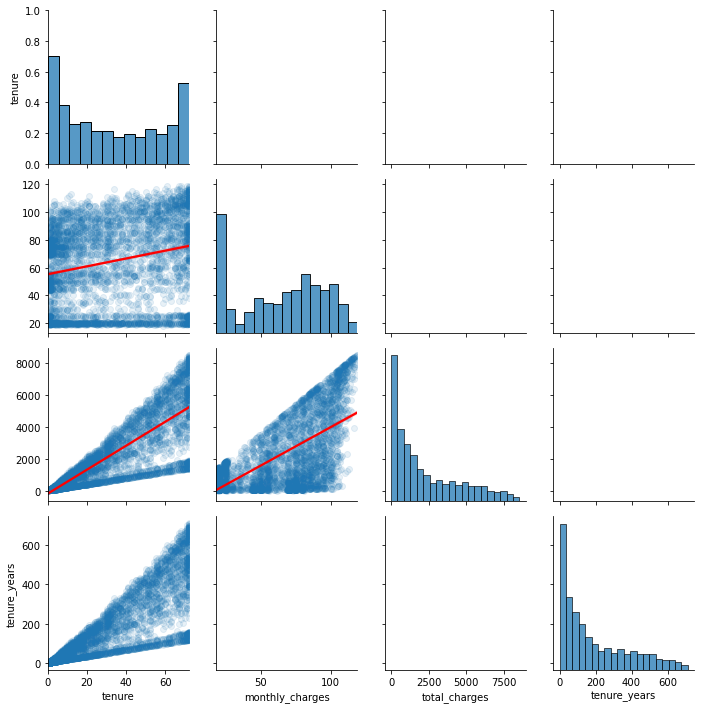

In [10]:
plot_variable_pairs(train)

3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [ ]:
df = months_to_years()
df.info()

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [ ]:
sns.swarmplot(x, y, t)